In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

# 1. 데이터 생성
- 남,여 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [11]:
random.randint(140,195)

187

In [17]:
data = []
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70),random.randint(140,175)])   
    # 남자 데이터 data추가
    data.append([random.randint(55, 95),random.randint(160,195)])
#data

In [19]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')
print('여자 : ',[female for female in data[::2]])
print('남자 : ',[male   for male   in data[1::2]])
print('=============================================')
print('여자 몸무게(x축) :',[female[0] for female in data[::2]])
print('여자 키(y축) :',   [female[1] for female in data[::2]])

print('남자 몸무게(x축) :',[male[0] for male in data[1::2]])
print('남자 키(y축) :',   [male[1] for male in data[1::2]])

여자 :  [[68, 146], [61, 170], [55, 152], [60, 172], [57, 165], [66, 152], [60, 143], [63, 140], [68, 151], [41, 142], [62, 152], [53, 148], [67, 148], [55, 143], [44, 170], [47, 170], [68, 148], [63, 164], [46, 171], [58, 159], [68, 170], [62, 156], [47, 140], [63, 150], [55, 157], [65, 167], [47, 151], [61, 170], [49, 155], [48, 149], [57, 143], [62, 141], [54, 165], [58, 167], [63, 157], [60, 149], [40, 168], [56, 145], [41, 145], [69, 145], [56, 153], [62, 161], [64, 152], [53, 166], [61, 168], [55, 141], [45, 141], [62, 152], [45, 148], [69, 160]]
남자 :  [[81, 187], [80, 172], [92, 175], [78, 171], [81, 164], [68, 191], [60, 195], [72, 185], [93, 191], [71, 194], [65, 175], [66, 174], [62, 178], [80, 191], [67, 179], [71, 178], [88, 169], [59, 190], [67, 169], [80, 190], [71, 195], [75, 189], [64, 161], [63, 181], [92, 187], [95, 164], [73, 170], [61, 174], [82, 166], [65, 170], [84, 194], [79, 183], [57, 171], [90, 160], [71, 187], [83, 169], [93, 189], [71, 179], [63, 174], [81, 17

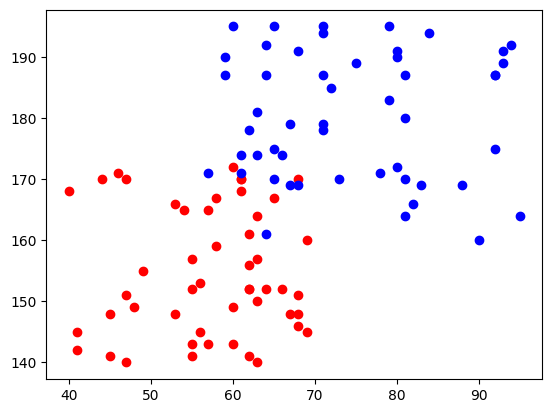

In [86]:
plt.plot([female[0] for female in data[::2]],
         [female[1] for female in data[::2]],'o',color='r')
plt.plot([male[0] for male in data[1::2]],
         [male[1] for male in data[1::2]],'o',color='b')
plt.show()

# 2. 군집화 로직
- 랜덤포인트를 아무데나 잡고 랜덤포인트를 중심으로 그룹화시키고
- 기존 포인트를 지우고 다시 중심점(포인트)을 잡아서 그룹화 하는 작업을 반복

In [26]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
random_points

[[58, 154], [58, 192]]

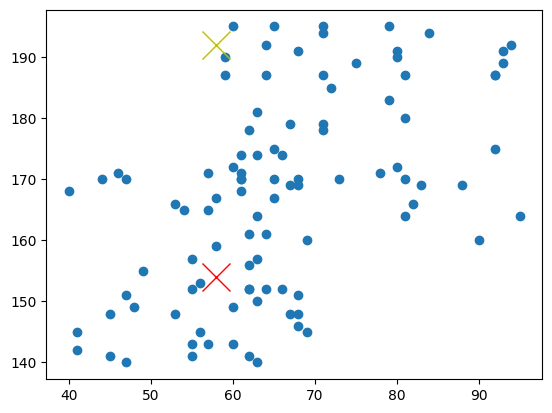

In [29]:
plt.plot([d[0] for d in data],
         [d[1] for d in data],'o')
plt.plot(random_points[0][0],
         random_points[0][1],'x', color='r', markersize=20)  # 기준점0(random_points[0])
plt.plot(random_points[1][0],
         random_points[1][1],'x', color='y', markersize=20)  # 기준점1(random_points[1])

In [31]:
# 두 점 거리를 return  피타고라스 정리 이용해서 거리를 구하는 함수  a:[0,0] 
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2 +(a[1]-b[1])**2 )
print(dist([0,0],[3,4]))
print(dist(random_points[0],data[0]))
print(dist(random_points[1],data[0]))

5.0
12.806248474865697
47.07440918375928


In [32]:
# random_points[0](기준점0)에 가까운 그룹과 random_points[1](기준점1)에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(66, 34)

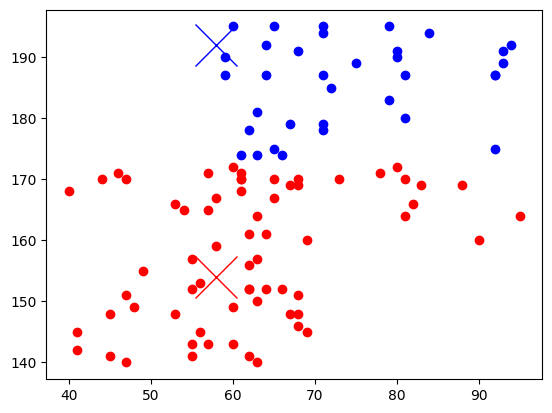

In [35]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0],'o', color='r')
plt.plot(random_points[0][0],
         random_points[0][1],'x',color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1],'o', color='b')
plt.plot(random_points[1][0],
         random_points[1][1],'x',color='b', markersize=30)

In [41]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]

random_points

[[61.696969696969695, 157.93939393939394],
 [73.76470588235294, 185.88235294117646]]

In [36]:
a = [1,2,3,4]
np.mean(a)

2.5

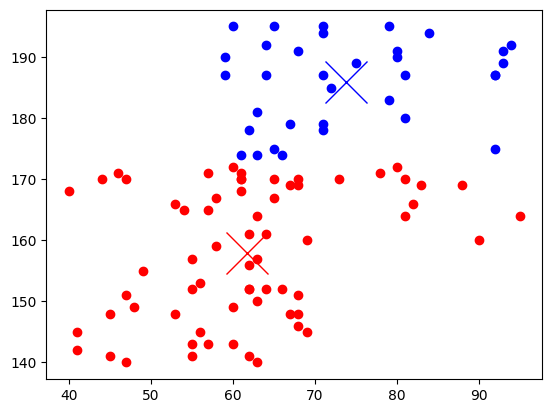

In [42]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0],'o', color='r')
plt.plot(random_points[0][0],
         random_points[0][1],'x',color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1],'o', color='b')
plt.plot(random_points[1][0],
         random_points[1][1],'x',color='b', markersize=30)

# 3. 군집화 전체 코드(for문 이용)
- 랜덤포인트 2개 지정
- 랜덤포인트 2개 출력과 시각화(x)
- for문
    * 랜덤포인트 2지점 기준으로 group0과 group1 나눔
    * group0의 중간점과 group1의 중간점으로 랜덤포인트 업데이트
    * 랜덤포인트 출력과 시각화

초기 기준점 : [[54, 144], [50, 166]]
1 번째 points : [[58.5, 147.53333333333333], [68.92857142857143, 175.97142857142856]]
2 번째 points : [[57.027027027027025, 149.97297297297297], [70.95238095238095, 177.6984126984127]]
3 번째 points : [[56.56818181818182, 152.61363636363637], [73.05357142857143, 179.08928571428572]]
4 번째 points : [[56.69565217391305, 153.2608695652174], [73.55555555555556, 179.5185185185185]]
5 번째 points : [[56.702127659574465, 153.63829787234042], [73.86792452830188, 179.67924528301887]]
6 번째 points : [[56.702127659574465, 153.63829787234042], [73.86792452830188, 179.67924528301887]]
7 번째 points : [[56.702127659574465, 153.63829787234042], [73.86792452830188, 179.67924528301887]]
8 번째 points : [[56.702127659574465, 153.63829787234042], [73.86792452830188, 179.67924528301887]]
9 번째 points : [[56.702127659574465, 153.63829787234042], [73.86792452830188, 179.67924528301887]]


(140.0, 195.0)

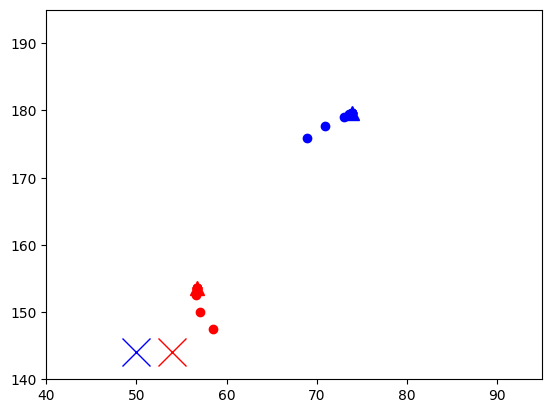

In [110]:
points = [
    [random.randint(40, 95),random.randint(140, 195)],
    [random.randint(40, 95),random.randint(140, 195)]
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1],'x',color='r', markersize=20)
plt.plot(points[1][0], points[0][1],'x',color='b', markersize=20)
for i in range(1,10):
    # 포인트 2개 지점을 기준으로 group0과 group1로 나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    #* group0의 중간점과 group1의 중간점으로 points 업데이트
    group0_meanX = np.mean([d[0] for d in group0])
    group0_meanY = np.mean([d[1] for d in group0])
    points[0] = [group0_meanX, group0_meanY]
    group1_meanX = np.mean([d[0] for d in group1])
    group1_meanY = np.mean([d[1] for d in group1])
    points[1] = [group1_meanX, group1_meanY]
    
    # * 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1],'o',color='r')
    plt.plot(points[1][0], points[1][1],'o',color='b')

plt.plot(points[0][0], points[0][1],'^',color='r', markersize=10)
plt.plot(points[1][0], points[1][1],'^',color='b', markersize=10)
plt.xlim([40,95])
plt.ylim([140,195])

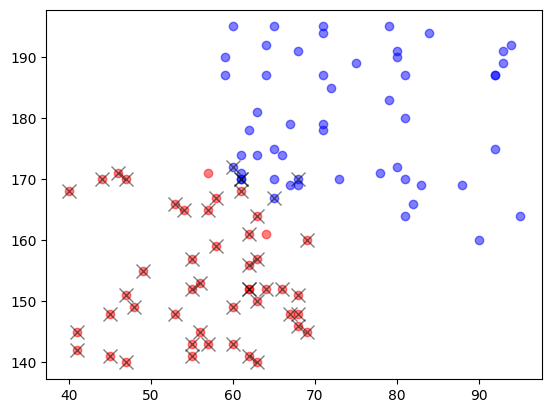

In [87]:
plt.plot([ d[0] for d in group0],
         [ d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([ d[0] for d in group1],
         [ d[1] for d in group1], 'o', color='b', alpha=0.5)

plt.plot([ d[0] for d in data[::2]],
         [ d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)
# plt.plot([ d[0] for d in group1],
#          [ d[1] for d in group1], 'o', color='b', alpha=0.5)


# 4. API(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    * 예측모델 : 분류, 회귀, 군집분석- fit(학습), predict(예측-분류/회귀) 
    * 변환모델 : 전처리시 사용 ex.스케일조정-fit(학습), transform(변환함수), fit_transform(학습-변환) *원핫인코딩, 

In [ ]:
# 군집분석 라이브러리가 경고 메시지(joblib 충돌)를 출력할 경우(대부분 멀티쓰레드문제) 아래 문장 실행
# import os
# os.environ['OMP_NUM_THREADS'] = '1'  # 단일 쓰레드 지정

In [116]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2,  # 2개 그룹으로 군집
               init='random', # 초기 기준점을 random하게
               n_init=10,     # 군집화를 10번 실행
               random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [117]:
# 기준점(중심점)
model.cluster_centers_

array([[ 74.56, 180.32],
       [ 57.04, 154.56]])

In [118]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [120]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

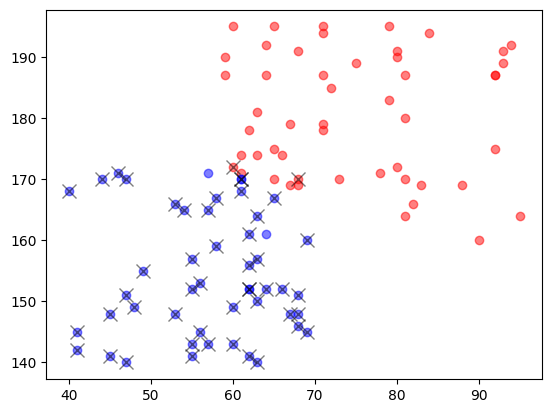

In [121]:
plt.plot([ d[0] for d in group0],
         [ d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([ d[0] for d in group1],
         [ d[1] for d in group1], 'o', color='b', alpha=0.5)

plt.plot([ d[0] for d in data[::2]],
         [ d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)